In [1]:
%matplotlib inline

# APSG tutorial - structural geology module for Python - Part 4

In [2]:
from apsg import *

## Fabric plots
Tensor-type objects (``ortensor``, ``ellipsoid``) could be visualized in several specialized plots. ``FlinnPlot`` class provide classical Flinn's deformation diagram, ``RamsayPlot`` class provide Ramsay modification of Flinn's deformation diagram, ``VollmerPlot`` class provide triangular fabric plot (Vollmer, 1989) and ``HsuPlot`` class provide Hsu fabric diagram using natural strains.

In [3]:
F = defgrad.from_comp(xx=1/1.1, zz=1.1)
g1 = linset.uniform_sfs(name='Uniform').transform(F)
Fp = defgrad.from_comp(xx=0.5, yy=0.5, zz=4)
g2 = linset.uniform_sfs(name='Cluster').transform(Fp @ F)
Fo = defgrad.from_comp(xx=2, yy=0.25, zz=2)
g3 = linset.uniform_sfs(name='Girdle').transform(Fo @ F)

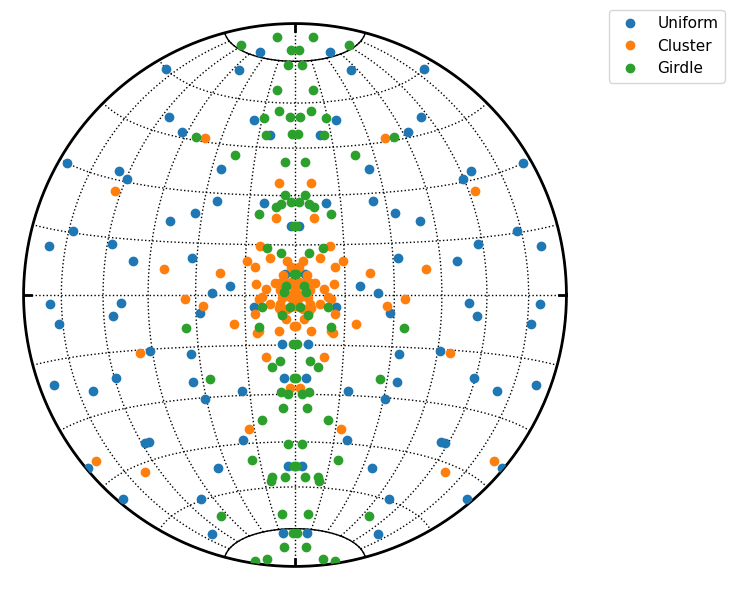

In [4]:
s = StereoNet()
s.line(g1, label=True)
s.line(g2, label=True)
s.line(g3, label=True)
s.show()

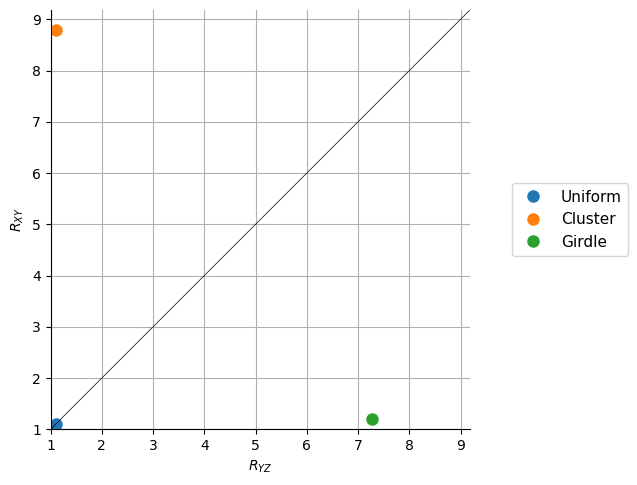

In [5]:
s = FlinnPlot()
s.point(g1.ortensor(), label=g1.name)
s.point(g2.ortensor(), label=g2.name)
s.point(g3.ortensor(), label=g3.name)
s.show()

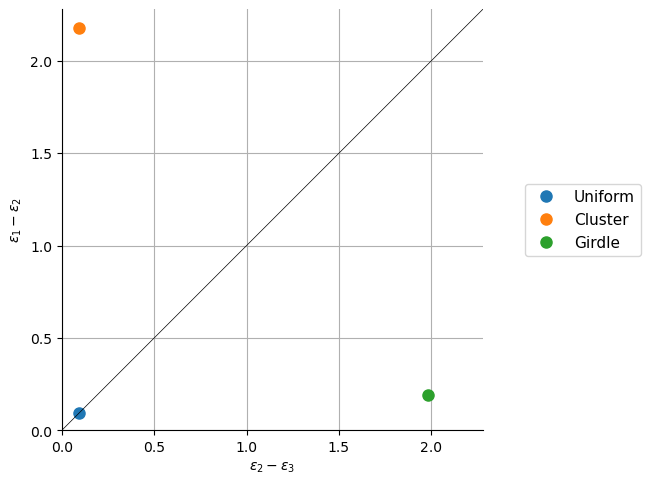

In [6]:
s = RamsayPlot()
s.point(g1.ortensor(), label=g1.name)
s.point(g2.ortensor(), label=g2.name)
s.point(g3.ortensor(), label=g3.name)
s.show()

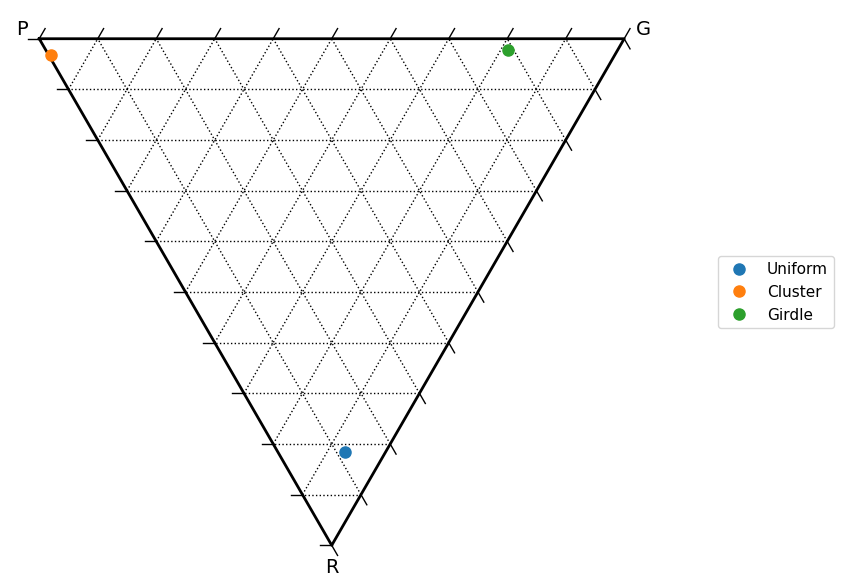

In [7]:
s = VollmerPlot()
s.point(g1.ortensor(), label=g1.name)
s.point(g2.ortensor(), label=g2.name)
s.point(g3.ortensor(), label=g3.name)
s.show()

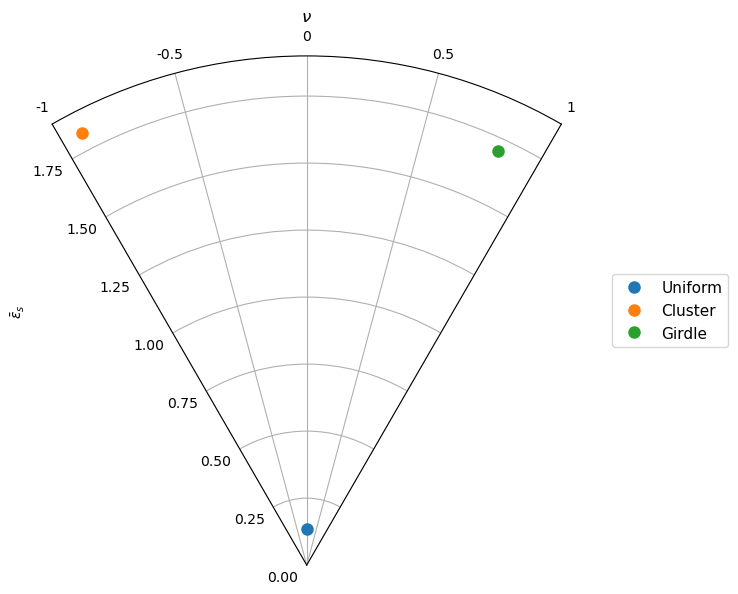

In [8]:
s = HsuPlot()
s.point(g1.ortensor(), label=g1.name)
s.point(g2.ortensor(), label=g2.name)
s.point(g3.ortensor(), label=g3.name)
s.show()

All fabric plots has ``path`` method which accepts ``ellipsoidset`` or ``ortensorset`` objects plotted as line.

In [9]:
F = defgrad.from_comp(xx=2, xy=2, yz=2, zz=0.5)
E = ellipsoid.from_defgrad(F)
L = velgrad.from_comp(xx=-2, zz=2)
Eevol = ellipsoidset([E.transform(L.defgrad(t/50)) for t in range(50)])

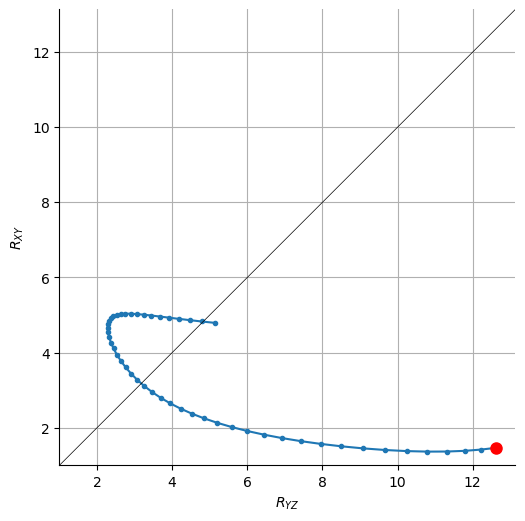

In [10]:
r = FlinnPlot()
r.path(Eevol, marker='.')
r.point(E, color='r', marker='o')
r.show()

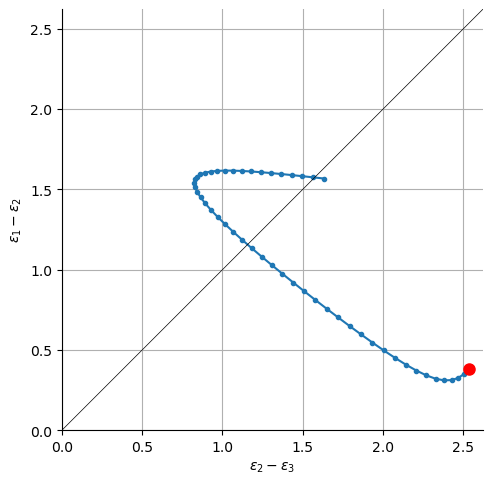

In [11]:
r = RamsayPlot()
r.path(Eevol, marker='.')
r.point(E, color='r', marker='o')
r.show()

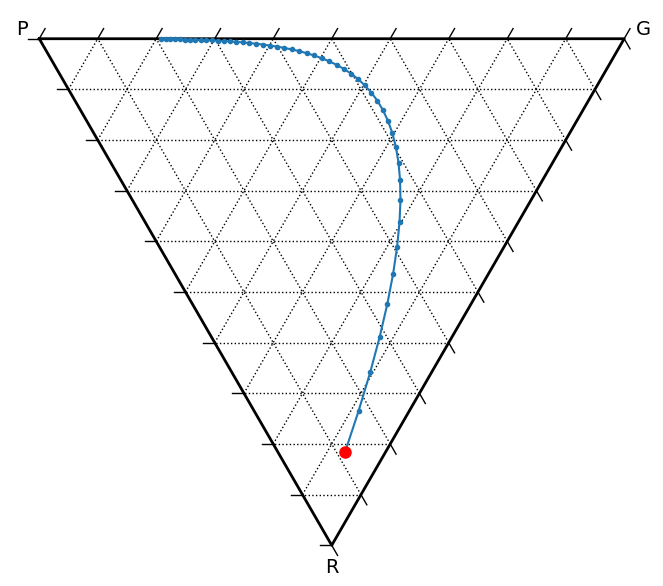

In [12]:
ot = g1.ortensor()
otevol = ortensorset([g1.transform(L.defgrad(t/50)).ortensor() for t in range(50)])
f = VollmerPlot()
f.path(otevol, marker='.')
f.point(ot, color='r', marker='o')
f.show()

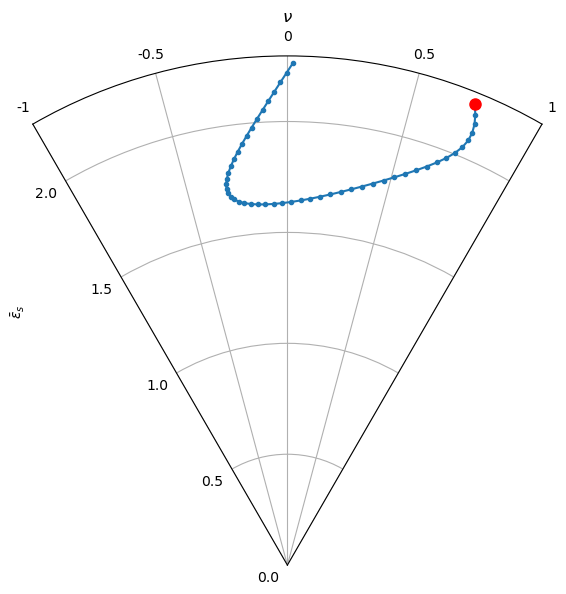

In [13]:
r = HsuPlot()
r.path(Eevol, marker='.')
r.point(E, color='r', marker='o')
r.show()